In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spideyjpg/spideyy.jpg
/kaggle/input/spidey-images/spidey.webp


# Signals & Systems Lab 2

## Edge Detection Program

In [70]:
def simple_edge_detection(image): 
   image = cv2.imread(image)
   edges_detected = cv2.Canny(image , 100, 200) 
   images = [image , edges_detected]
   location = [121, 122] 
   for loc, edge_image in zip(location, images): 
      plt.subplot(loc) 
      plt.imshow(edge_image, cmap='gray')
#    cv2.imwrite('edge_detected.png', edges_detected) 
#    plt.savefig('edge_plot.png') 
   plt.show()


In [5]:
!pip install opencv-python opencv-contrib-python

In [72]:
def simple_edge_detection_V2(image_path):
    # Read the image from the specified path
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read the image from {image_path}")
        return
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges_detected = cv2.Canny(gray_image, 100, 200)
    
    images = [image, edges_detected]
    location = [121, 122] 
    for loc, edge_image in zip(location, images): 
      plt.subplot(loc) 
      plt.imshow(edge_image, cmap='gray')
#    cv2.imwrite('edge_detected.png', edges_detected) 
#    plt.savefig('edge_plot.png') 
    plt.show()
    # cv2.destroyAllWindows()


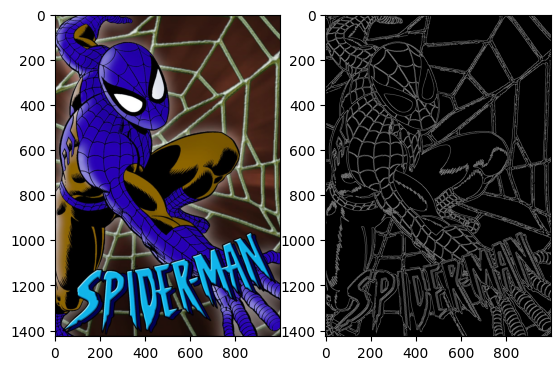

In [71]:
simple_edge_detection("/kaggle/input/spideyjpg/spideyy.jpg")

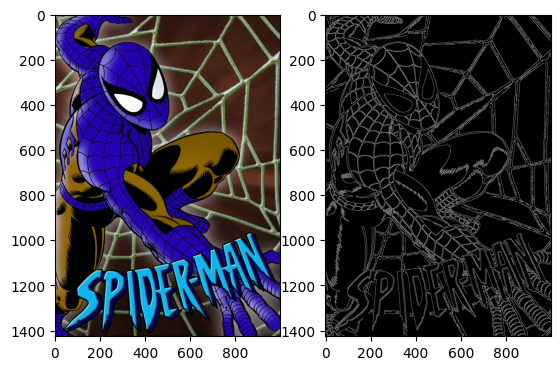

In [73]:
simple_edge_detection_V2("/kaggle/input/spideyjpg/spideyy.jpg")

## Convolution Experiment

## 3.2 Algo to see how convolution works (Zeros convoluted with randomized spikes)

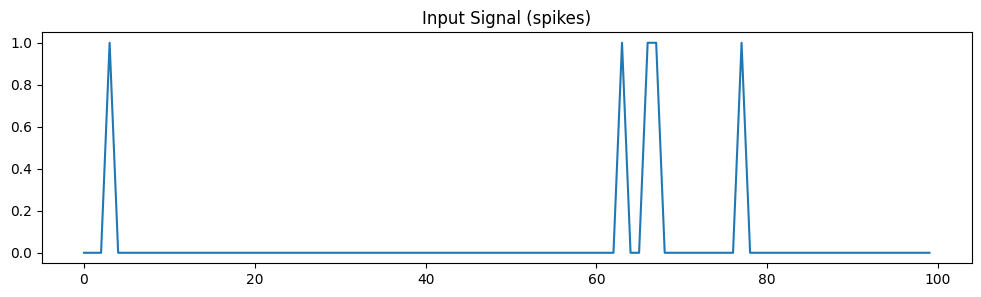

In [14]:
n_samples = 100
signal = np.zeros(n_samples)
signal[np.random.randint(0, n_samples, 5)] = 1

plt.figure(figsize=(12,3))
plt.plot(signal)
plt.title("Input Signal (spikes)")
plt.show()

## 3.3 Creating Boxcar Kernel

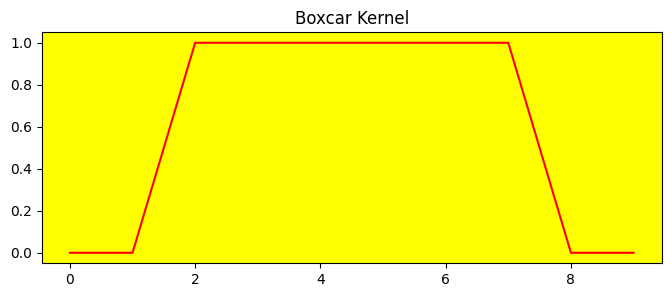

In [19]:
kernel = np.zeros(10) #10 samples long
kernel[2:8] = 1 # 6 samples of box

plt.figure(figsize=(8,3))
ax = plt.gca()
ax.set_facecolor('yellow')
plt.plot(kernel,color='red')
plt.title("Boxcar Kernel")
plt.show()

## 3.4 Dot Product

In [27]:
a = np.random.randint(1,10,20)
b = np.random.randint(1,10,20)
print("a: ", a)
print()
print('b: ', b)
print()
print("Dot Product:", np.dot(a,b))

a:  [5 2 7 4 2 4 9 4 4 9 4 8 4 4 7 8 9 8 5 7]

b:  [5 5 9 6 2 9 4 2 2 9 9 2 6 9 5 9 8 9 6 7]

Dot Product: 737


## 3.5 Convolve using dot product and shifting kernel

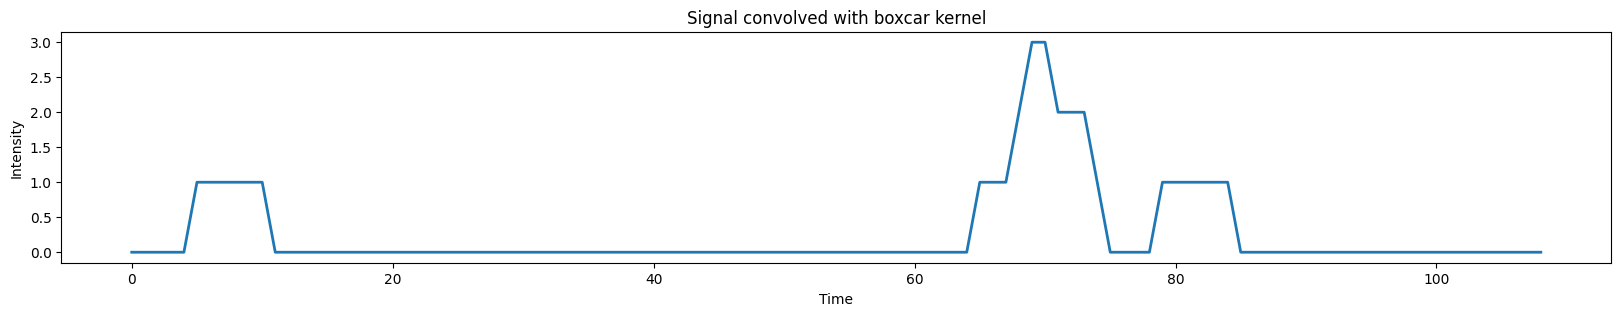

In [28]:
shifted_kernel = np.zeros((n_samples, n_samples+len(kernel)-1))
rev_kernel = kernel[::-1]

for i in range(n_samples):
    shifted_kernel[i, i:i+len(kernel)] = rev_kernel

convolved_signal = np.dot(signal, shifted_kernel)

plt.figure(figsize=(20,3))
plt.plot(convolved_signal, linewidth=2)
plt.title("Signal convolved with boxcar kernel")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.show()

## Redoing with more number of spikes in the signal

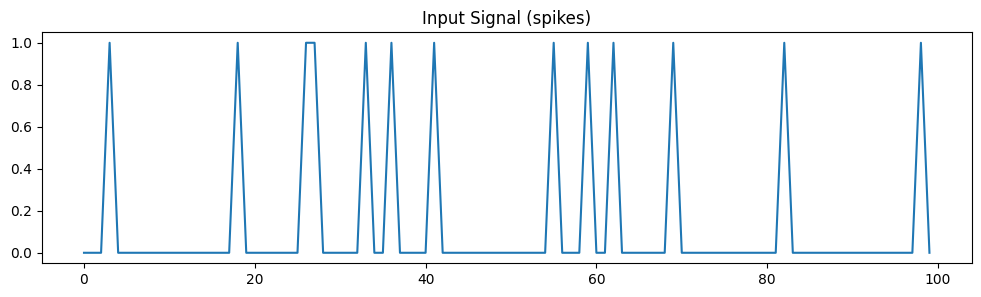

In [30]:
n_samples = 100
signal = np.zeros(n_samples)
signal[np.random.randint(0, n_samples, 15)] = 1

plt.figure(figsize=(12,3))
plt.plot(signal)
plt.title("Input Signal (spikes)")
plt.show()

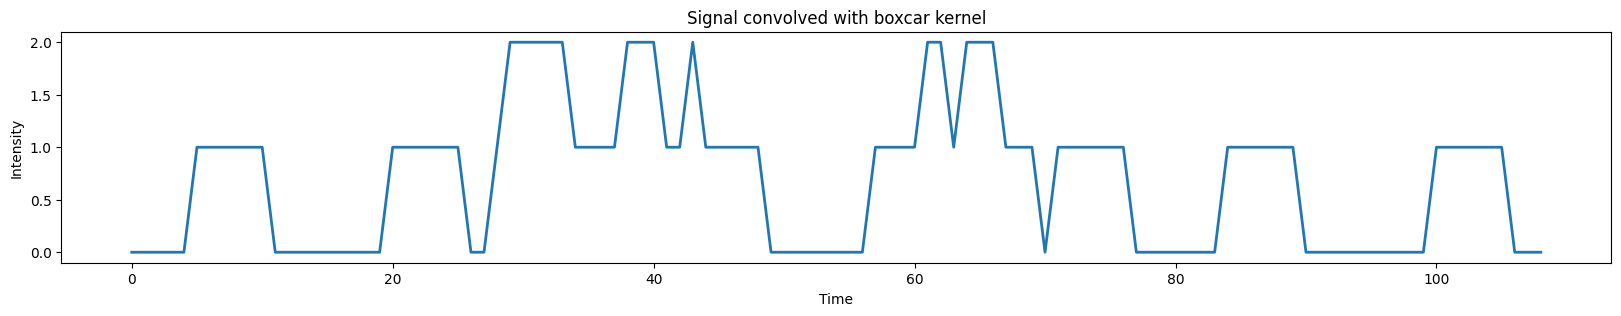

In [31]:
shifted_kernel = np.zeros((n_samples, n_samples+len(kernel)-1))
rev_kernel = kernel[::-1]

for i in range(n_samples):
    shifted_kernel[i, i:i+len(kernel)] = rev_kernel

convolved_signal = np.dot(signal, shifted_kernel)

plt.figure(figsize=(20,3))
plt.plot(convolved_signal, linewidth=2)
plt.title("Signal convolved with boxcar kernel")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.show()

## 4.1 Impulse Simulation

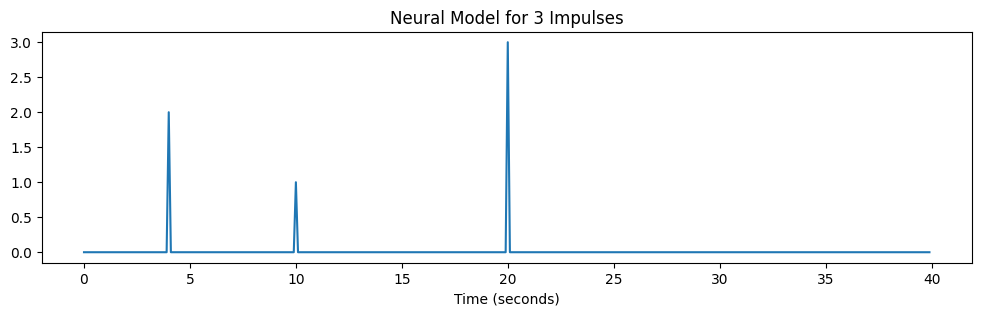

In [42]:
times = np.arange(0, 40, 0.1)
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)

i_time_4 = int(4/0.1)
i_time_10 = int(10/0.1)
i_time_20 = int(20/0.1)

neural_signal[i_time_4] = 2
neural_signal[i_time_10] = 1
neural_signal[i_time_20] = 3

plt.figure(figsize=(12,3))
plt.plot(times, neural_signal)
plt.title("Neural Model for 3 Impulses")
plt.xlabel("Time (seconds)")
plt.show()

# Redo

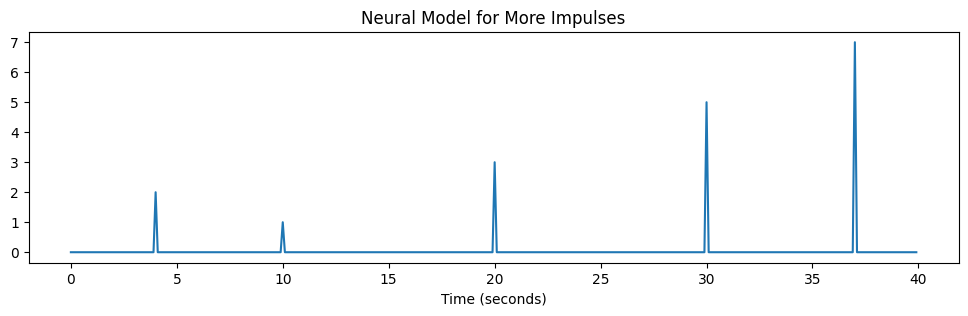

In [44]:
times = np.arange(0, 40, 0.1)
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)

i_time_4 = int(4/0.1)
i_time_10 = int(10/0.1)
i_time_20 = int(20/0.1)
i_time_30 = int(30/0.1)
i_time_37 = int(37/0.1)

neural_signal[i_time_4] = 2
neural_signal[i_time_10] = 1
neural_signal[i_time_20] = 3
neural_signal[i_time_30] = 5
neural_signal[i_time_37] = 7

plt.figure(figsize=(12,3))
plt.plot(times, neural_signal)
plt.title("Neural Model for More Impulses")
plt.xlabel("Time (seconds)")
plt.show()

## 4.2 Hemodynamic Response

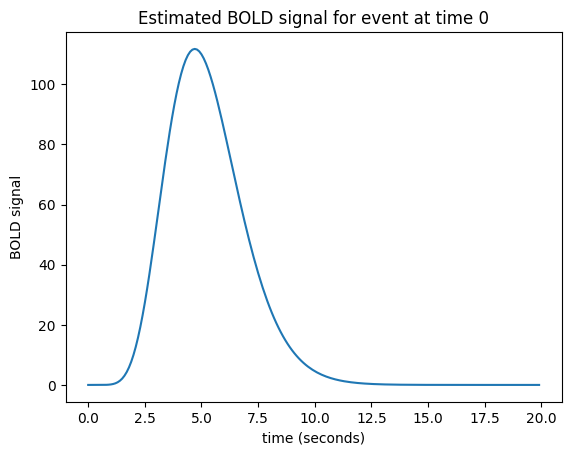

In [36]:
def hrf(t):
    return t**8.6 * np.exp(-t / 0.547)

hrf_times = np.arange(0, 20, 0.1)
hrf_signal = hrf(hrf_times)
n_hrf_points = len(hrf_signal)

plt.plot(hrf_times, hrf_signal)
plt.title('Estimated BOLD signal for event at time 0')
plt.xlabel("time (seconds)")
plt.ylabel("BOLD signal")
plt.show()

## 4.3 Hemodynamic output from Neural input

Text(0.5, 1.0, 'Output BOLD signal for three impulses')

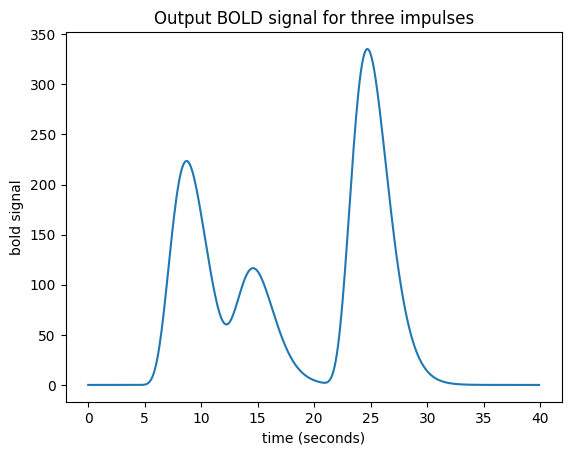

In [38]:
bold_signal = np.zeros(n_time_points) #what is n_time_points? Check 4.1
bold_signal[i_time_4:i_time_4 + n_hrf_points] = hrf_signal * 2
bold_signal[i_time_10:i_time_10 + n_hrf_points] += hrf_signal * 1
bold_signal[i_time_20:i_time_20 + n_hrf_points] += hrf_signal * 3
plt.plot(times, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal for three impulses')

## 4.4 General Case Algorithm

Text(0.5, 1.0, 'Output BOLD signal using our algorithm')

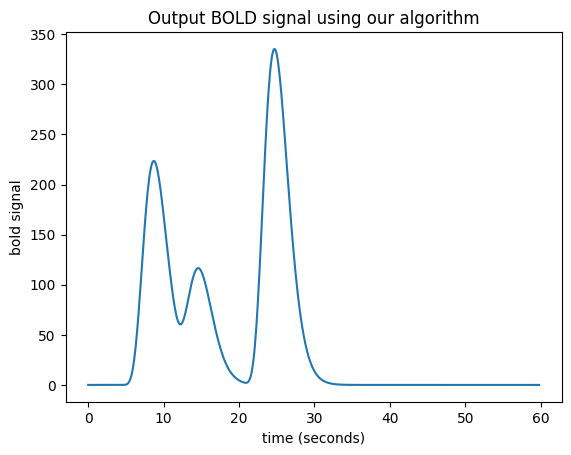

In [40]:
N = n_time_points
M = n_hrf_points
bold_signal = np.zeros(N+M -1) # extending the output vector by M-1 points
for i in range(N):
    # Adding the shifted, scaled HRF
    bold_signal[i : i + M] += hrf_signal * neural_signal[i]
# We have to extend 'times' to deal with more points in 'bold_signal'
extra_times = np.arange(n_hrf_points - 1) * 0.1 + 40
times_and_tail = np.concatenate((times, extra_times))
plt.plot(times_and_tail, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal using our algorithm')

# Redo

Text(0.5, 1.0, 'Output BOLD signal using our algorithm')

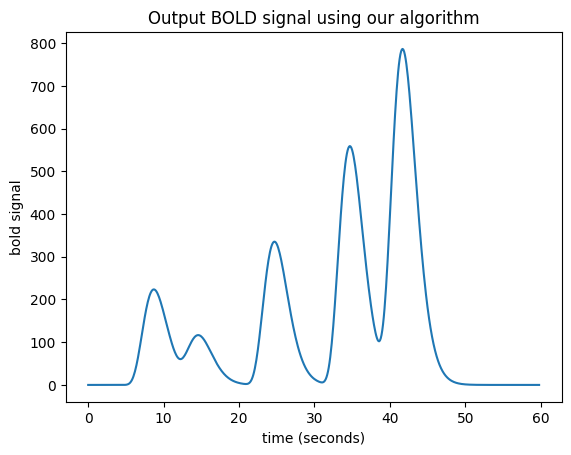

In [47]:
N = n_time_points
M = n_hrf_points
bold_signal = np.zeros(N+M -1) # extending the output vector by M-1 points
for i in range(N):
    # Adding the shifted, scaled HRF
    bold_signal[i : i + M] += hrf_signal * neural_signal[i]
# We have to extend 'times' to deal with more points in 'bold_signal'
extra_times = np.arange(n_hrf_points - 1) * 0.1 + 40
times_and_tail = np.concatenate((times, extra_times))
plt.plot(times_and_tail, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal using our algorithm')

## 4.5 Validate Using Inbuilt function

Text(0.5, 1.0, 'Our algorithm is the same as convolution')

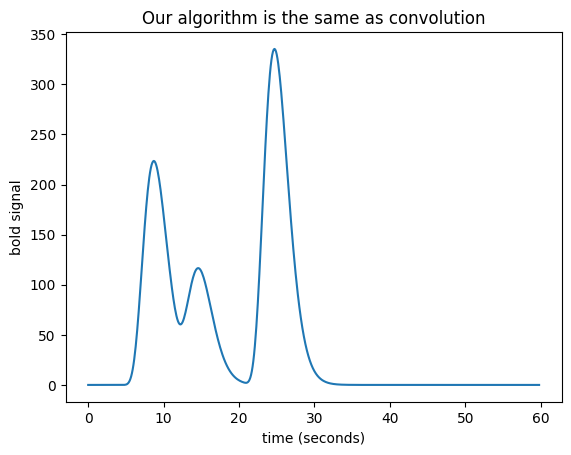

In [41]:
bold_signal_conc = np.convolve(neural_signal, hrf_signal)
plt.plot(times_and_tail, bold_signal_conc)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Our algorithm is the same as convolution')

## 5.1 Plot impulse response and compare

In [48]:
from scipy import signal
impulseH1 = [0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523]
impulseH2 = [-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523]
impulseH3 = np.convolve(impulseH1, impulseH2)

In [53]:
impulseH1 = np.array([0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523])
impulseH2 = np.array([-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523])

# Convolve impulseH1 and impulseH2
impulseH3 = np.convolve(impulseH1, impulseH2)

# Create a signal x1, a single impulse at n=0
x1 = np.zeros(30)
x1[0] = 1

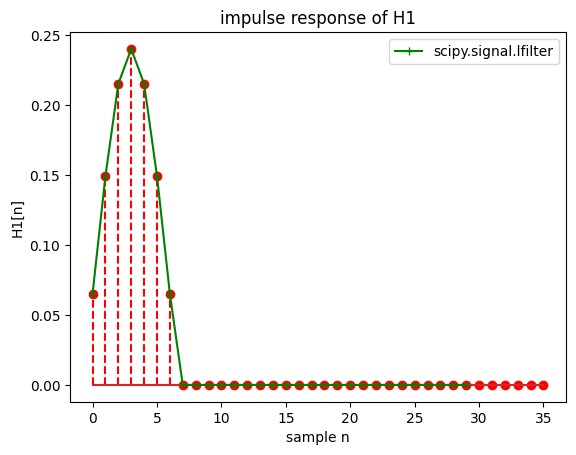

In [54]:
# Calculate the convolution using np.convolve and scipy.signal.lfilter
y_float1 = np.convolve(x1, impulseH1)
y_float2 = signal.lfilter(impulseH1, [1], x1)

# Plot the results
plt.figure()
plt.stem(y_float1, linefmt='r--')
plt.plot(y_float2, 'g-+', label='scipy.signal.lfilter')
plt.title('impulse response of H1')
plt.xlabel('sample n')
plt.ylabel('H1[n]')
plt.legend()
plt.show()

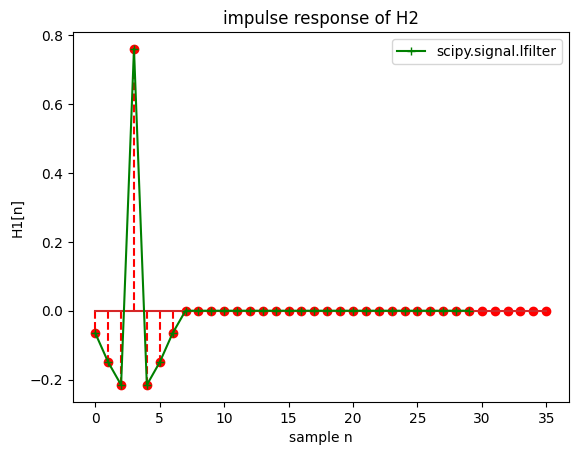

In [56]:
# Calculate the convolution using np.convolve and scipy.signal.lfilter
y_float1 = np.convolve(x1, impulseH2)
y_float2 = signal.lfilter(impulseH2, [1], x1)

# Plot the results
plt.figure()
plt.stem(y_float1, linefmt='r--')
plt.plot(y_float2, 'g-+', label='scipy.signal.lfilter')
plt.title('impulse response of H2')
plt.xlabel('sample n')
plt.ylabel('H1[n]')
plt.legend()
plt.show()

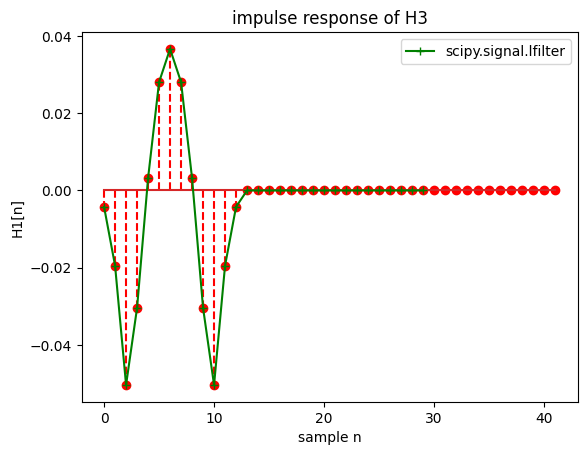

In [57]:
# Calculate the convolution using np.convolve and scipy.signal.lfilter
y_float1 = np.convolve(x1, impulseH3)
y_float2 = signal.lfilter(impulseH3, [1], x1)

# Plot the results
plt.figure()
plt.stem(y_float1, linefmt='r--')
plt.plot(y_float2, 'g-+', label='scipy.signal.lfilter')
plt.title('impulse response of H3')
plt.xlabel('sample n')
plt.ylabel('H1[n]')
plt.legend()
plt.show()

## 5.2 Implement own code as module

In [58]:
x = np.zeros(30)
x[0] = 1
x[15] = -2

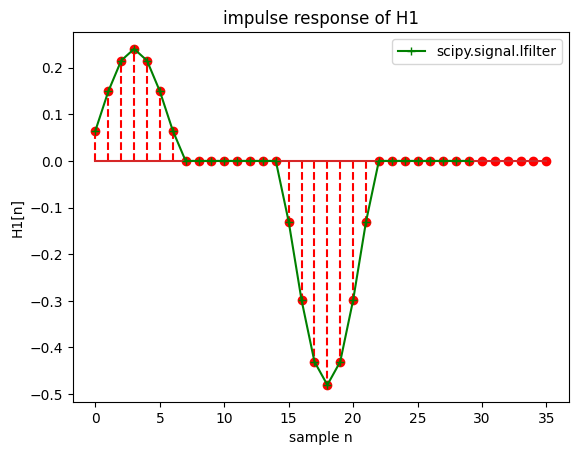

In [59]:
# Calculate the convolution using np.convolve and scipy.signal.lfilter
y_float1 = np.convolve(x, impulseH1)
y_float2 = signal.lfilter(impulseH1, [1], x)

# Plot the results
plt.figure()
plt.stem(y_float1, linefmt='r--')
plt.plot(y_float2, 'g-+', label='scipy.signal.lfilter')
plt.title('impulse response of H1')
plt.xlabel('sample n')
plt.ylabel('H1[n]')
plt.legend()
plt.show()

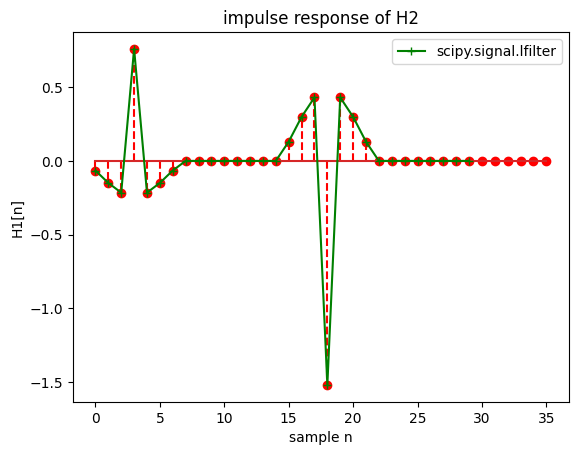

In [60]:
# Calculate the convolution using np.convolve and scipy.signal.lfilter
y_float1 = np.convolve(x, impulseH2)
y_float2 = signal.lfilter(impulseH2, [1], x)

# Plot the results
plt.figure()
plt.stem(y_float1, linefmt='r--')
plt.plot(y_float2, 'g-+', label='scipy.signal.lfilter')
plt.title('impulse response of H2')
plt.xlabel('sample n')
plt.ylabel('H1[n]')
plt.legend()
plt.show()

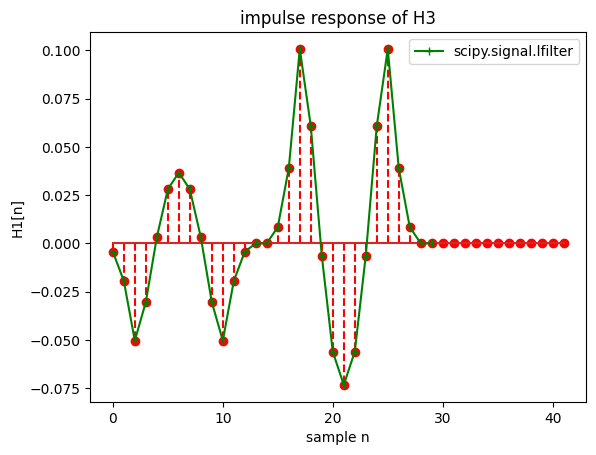

In [61]:
# Calculate the convolution using np.convolve and scipy.signal.lfilter
y_float1 = np.convolve(x, impulseH3)
y_float2 = signal.lfilter(impulseH3, [1], x)

# Plot the results
plt.figure()
plt.stem(y_float1, linefmt='r--')
plt.plot(y_float2, 'g-+', label='scipy.signal.lfilter')
plt.title('impulse response of H3')
plt.xlabel('sample n')
plt.ylabel('H1[n]')
plt.legend()
plt.show()

## 5.3 Linearity Checking

In [62]:
x1 = np.zeros(30); x1[0] = 1
x2 = np.zeros(30); x2[15] = -2

In [64]:
y1 = np.convolve(x1, impulseH3)
y2 = np.convolve(x2, impulseH3)
one = np.convolve(x1+x2, impulseH3)
two = y1 + y2

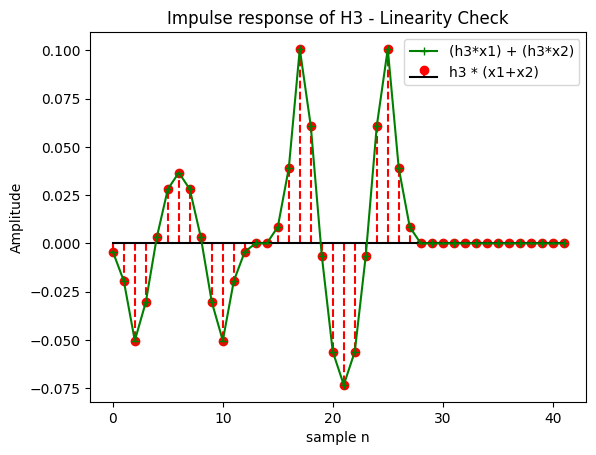

In [66]:
plt.figure()
plt.stem(one, linefmt='r--', markerfmt='ro', basefmt='k', label='h3 * (x1+x2)')
plt.plot(two, 'g-+', label='(h3*x1) + (h3*x2)')
plt.title('Impulse response of H3 - Linearity Check')
plt.xlabel('sample n')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

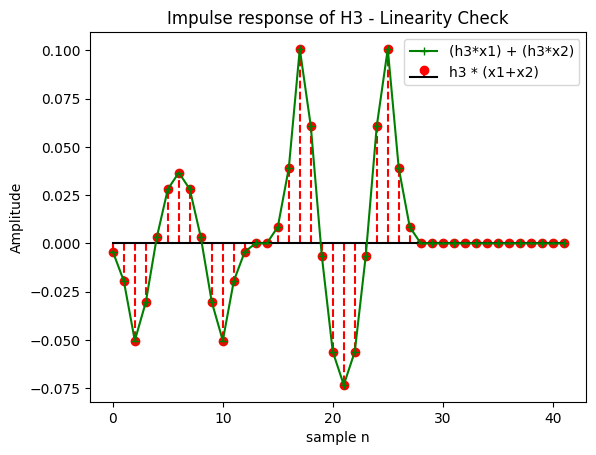

In [69]:
plt.figure()
plt.stem(two, linefmt='r--', markerfmt='ro', basefmt='k', label='h3 * (x1+x2)')
plt.plot(one, 'g-+', label='(h3*x1) + (h3*x2)')
plt.title('Impulse response of H3 - Linearity Check')
plt.xlabel('sample n')
plt.ylabel('Amplitude')
plt.legend()
plt.show()